# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

In [376]:
# Import Library
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [377]:
# Load Dataset
dataset_path = "../housing_raw.csv"
df = pd.read_csv(dataset_path)

In [378]:
# Lihat 5 baris pertama
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [379]:
# Statistik Dasar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [380]:
# Statistik Deskriptif
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [381]:
#Cek Missing Value
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

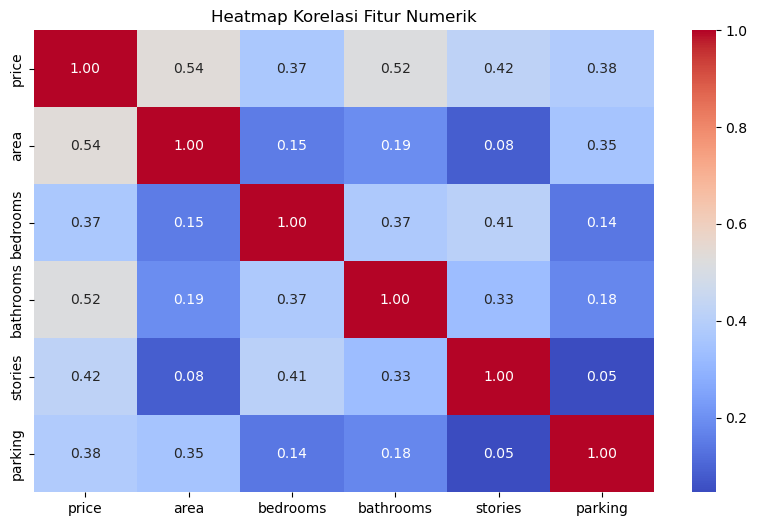

In [382]:
# Visualisasi korelasi fitur numerik
numeric_cols = df.select_dtypes(include=np.number)

plt.figure(figsize=(10,6))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()


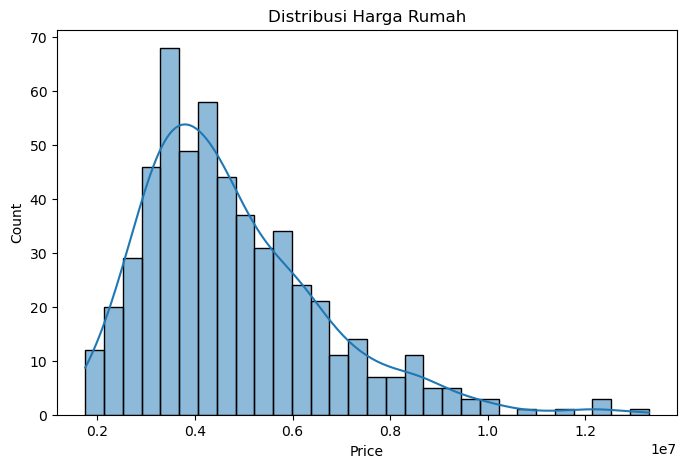

In [383]:
# Visualisasi distribusi harga
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Distribusi Harga Rumah")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

In [384]:
# Tampilkan count nilai kategorikal
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}:\n", df[col].value_counts())


mainroad:
 mainroad
yes    468
no      77
Name: count, dtype: int64

guestroom:
 guestroom
no     448
yes     97
Name: count, dtype: int64

basement:
 basement
no     354
yes    191
Name: count, dtype: int64

hotwaterheating:
 hotwaterheating
no     520
yes     25
Name: count, dtype: int64

airconditioning:
 airconditioning
no     373
yes    172
Name: count, dtype: int64

prefarea:
 prefarea
no     417
yes    128
Name: count, dtype: int64

furnishingstatus:
 furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [385]:
# Hapus duplikat
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"Removed {before - after} duplicate rows")
df.head()

Removed 0 duplicate rows


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [386]:
# Handle Missing Values
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include='object').columns

# Numerik: isi dengan median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Kategorikal: isi dengan modus
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values handled.")
df.head()

Missing values handled.


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [387]:
# Deteksi & hapus outlier (kecuali kolom penting)
for col in num_cols:
    if col in ["bedrooms","bathrooms","stories","parking"]:
        continue
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print("Outliers handled.")
df.head()

Outliers handled.


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished


In [388]:
# Simpan harga asli
df["price_original"] = df["price"]

# Scaling numerik kecuali kolom penting
scaler = StandardScaler()
cols_to_scale = [col for col in num_cols if col not in ["bedrooms","bathrooms","stories","parking"]]
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print("Numeric features scaled (except important columns).")
df.head()

Numeric features scaled (except important columns).


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_original
15,2.843893,0.624429,4,1,2,yes,no,yes,no,no,2,no,semi-furnished,9100000
16,2.843893,0.961991,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished,9100000
17,2.756024,2.030937,3,2,4,yes,no,no,no,yes,2,no,furnished,8960000
18,2.712090,-0.163216,3,2,2,yes,yes,no,no,yes,2,no,furnished,8890000
19,2.690123,0.860722,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished,8855000


In [389]:
# Encode Categorical
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print("Categorical features encoded.")
df.head()

Categorical features encoded.


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_original
15,2.843893,0.624429,4,1,2,1,0,1,0,0,2,0,1,9100000
16,2.843893,0.961991,4,2,2,1,1,1,0,1,1,1,2,9100000
17,2.756024,2.030937,3,2,4,1,0,0,0,1,2,0,0,8960000
18,2.712090,-0.163216,3,2,2,1,1,0,0,1,2,0,0,8890000
19,2.690123,0.860722,3,2,2,1,0,0,0,1,1,1,1,8855000


In [390]:
# Binning Price
df['price_bin'] = pd.qcut(df['price_original'], q=3, labels=["Low","Medium","High"])
print("Price binned into categories (based on original price).")
df.head()

Price binned into categories (based on original price).


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_original,price_bin
15,2.843893,0.624429,4,1,2,1,0,1,0,0,2,0,1,9100000,High
16,2.843893,0.961991,4,2,2,1,1,1,0,1,1,1,2,9100000,High
17,2.756024,2.030937,3,2,4,1,0,0,0,1,2,0,0,8960000,High
18,2.712090,-0.163216,3,2,2,1,1,0,0,1,2,0,0,8890000,High
19,2.690123,0.860722,3,2,2,1,0,0,0,1,1,1,1,8855000,High


In [391]:
# Tampilkan 5 baris pertama setelah preprocessing
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_original,price_bin
15,2.843893,0.624429,4,1,2,1,0,1,0,0,2,0,1,9100000,High
16,2.843893,0.961991,4,2,2,1,1,1,0,1,1,1,2,9100000,High
17,2.756024,2.030937,3,2,4,1,0,0,0,1,2,0,0,8960000,High
18,2.712090,-0.163216,3,2,2,1,1,0,0,1,2,0,0,8890000,High
19,2.690123,0.860722,3,2,2,1,0,0,0,1,1,1,1,8855000,High


In [392]:
# Menyimpan dataset
output_dir = "./housing_preprocessed"
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, "housing_eksperimen_preprocessed.csv")
df.to_csv(output_file, index=False)

print(f"Preprocessed dataset saved as '{output_file}'")

Preprocessed dataset saved as './housing_preprocessed\housing_eksperimen_preprocessed.csv'
